In [126]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import pandas_geojson as geo_pd
import missingno as msno
%matplotlib inline

In [182]:
# LOADING DATA
listings = pd.read_csv('https://www.inf.ed.ac.uk/teaching/courses/fds/data/project-2022-2023/airbnb/listings.csv.gz')

In [128]:
calendar = pd.read_csv('https://www.inf.ed.ac.uk/teaching/courses/fds/data/project-2022-2023/airbnb/calendar.csv.gz')

In [129]:
neighbourhoods = geo_pd.read_geojson_url('https://www.inf.ed.ac.uk/teaching/courses/fds/data/project-2022-2023/airbnb/neighbourhoods.geojson')

In [130]:
reviews = pd.read_csv('https://www.inf.ed.ac.uk/teaching/courses/fds/data/project-2022-2023/airbnb/reviews.csv.gz')

<AxesSubplot:>

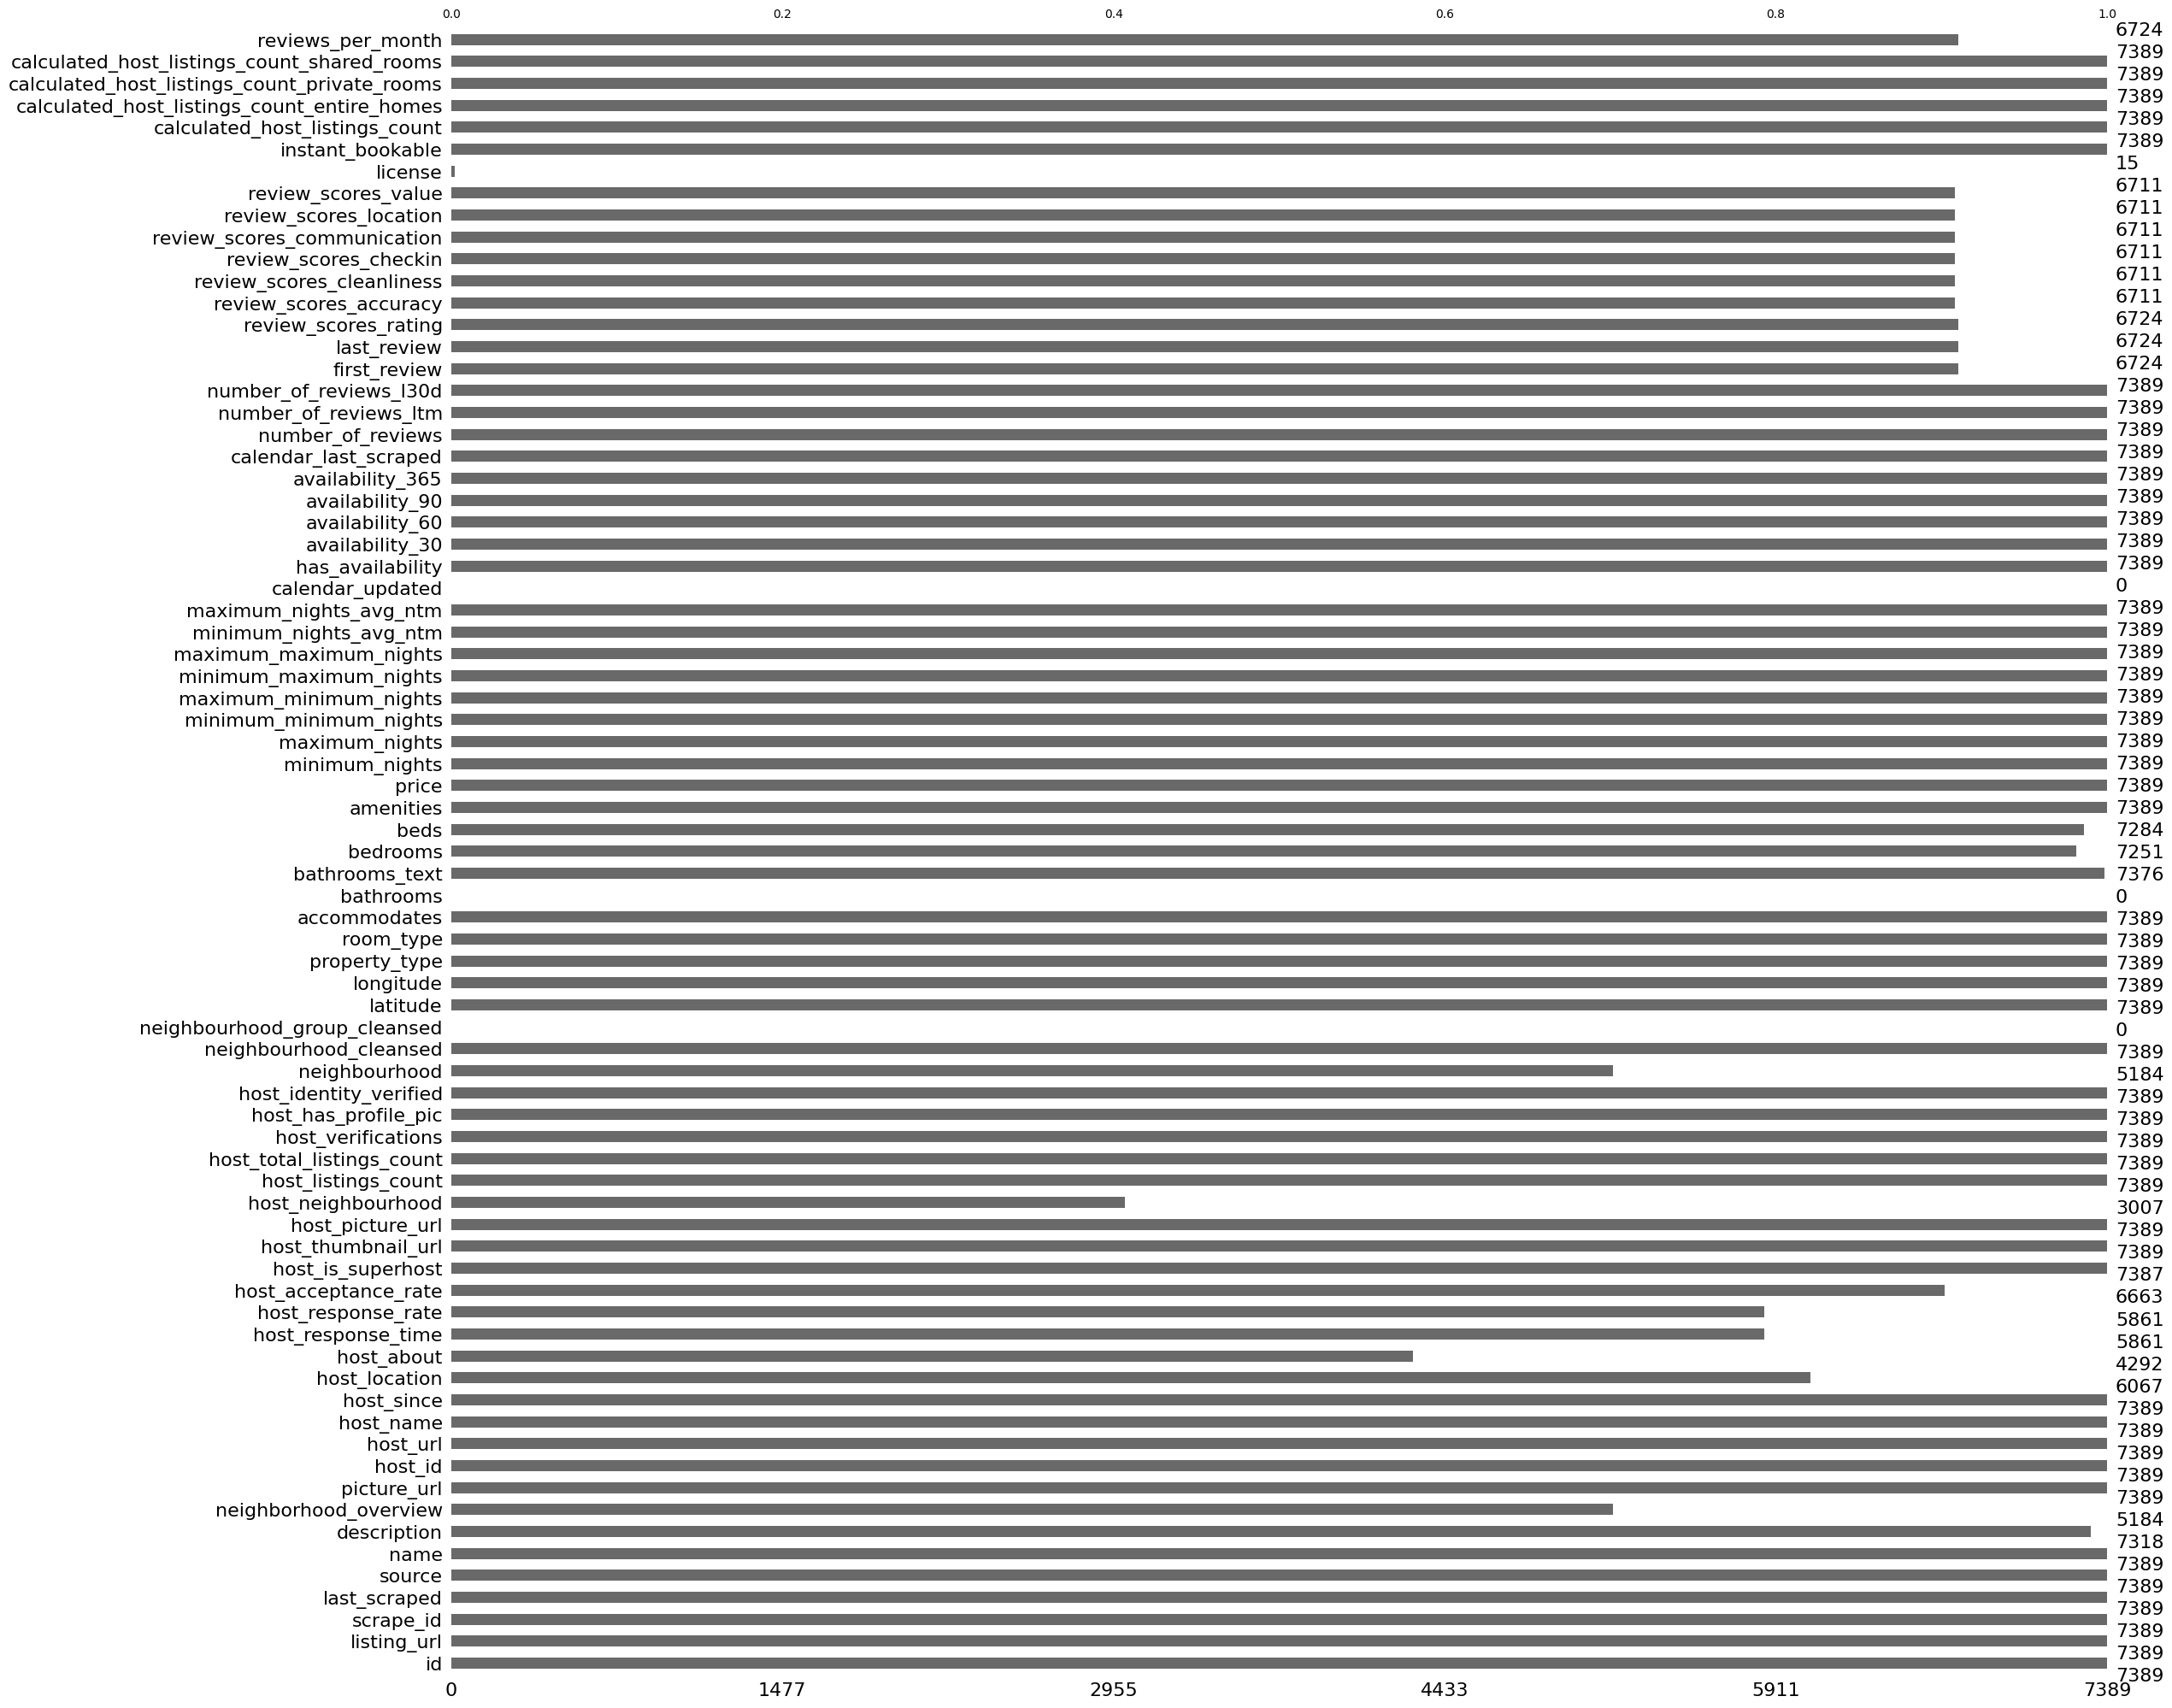

In [131]:
msno.bar(listings)

## Cleansing Ideas:
- License
- calendar update??
- Bathroom text after extractin numerical data and adding to bathrooms
- neighbourhood group cleansed (maybe fill data using geojson?)
- neighbourhood
- host neighbourhood
- host acceptance rate (fill)
- host response rate (fill)
- host response time (fill)
- host about
- host location ??
- neighbouthood overview
- drop non numerical columns which have more than X unique values ??


In [132]:
for i in (listings['neighborhood_overview'].head(10)):
    print(i)

The neighbourhood is in the historic New Town, renowned for its Georgian architecture and a World Heritage Site.  Whilst it is a 5 minute walk to Princes Street, it has its own distinctive atmosphere with lovely independent shops, boutiques, restaurants & bars.<br />To view my Guidebook, click on More about Location under the map, then click on Show Host Guidebook at the bottom of the Location pop-up.
The location is the perfect for tourism , short stay, holiday city break
Great location for access to the city centre, either on foot or by bus with excellent pubs and restaurants (Italian, Indian, Chinese, Brazilian) minutes walk away.<br /><br />Things to do in Edinburgh - FREE<br /> <br />•	Visit the national museum on Chambers Street – excellent. You could spend all day here! <br /> <br />•	Visit the national gallery (on Princes street) and the modern art galleries <br /> <br />•	Walk from the castle to the palace along the royal mile – there are many different museums along this stre

['100%' '90%' '99%' '98%' '97%' '96%' '94%' '0%' '93%' '91%' '95%' '88%'
 '92%' '86%' '75%' '89%' '67%' '83%' '80%' '50%' '85%' '82%' '87%' '33%'
 '1%' '79%' '73%' '71%' '74%' '78%' '84%' '81%' '77%' '35%' '56%' '70%'
 '60%' '76%' '64%' '49%' '68%' '72%' '44%' '25%' '69%' '43%' '38%' '19%'
 '62%' '40%' '59%' '63%' '61%' '57%' '66%' '58%' '65%' '46%' '51%' '42%'
 '52%' '47%' '45%' '36%' '53%' '54%' '55%' '39%' '48%' '14%' '17%' '30%'
 '21%' '29%' '7%' '20%' '10%' '6%' '23%' '37%' '22%' '13%']
[2863  801  789  347  299  193  135  117  114  112  110  108  108   79
   74   73   72   64   57   56   54   46   44   43   37   34   30   29
   29   28   28   25   24   21   18   18   17   17   16   16   15   14
   13   13   11   11   11   10   10   10   10   10    9    8    8    7
    7    7    5    4    4    4    3    3    3    3    3    3    3    3
    2    2    2    2    2    2    2    1    1    1    1    1]


<BarContainer object of 82 artists>

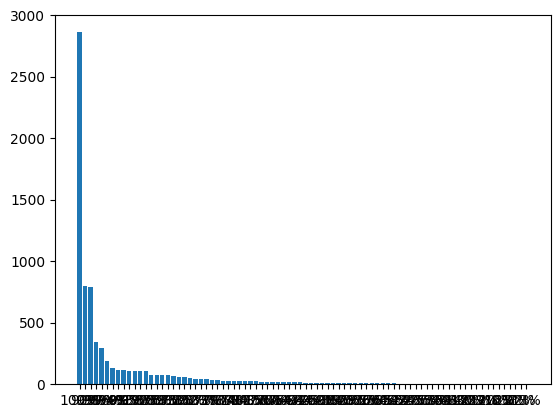

In [186]:
# TEST TO SEE DISTRIBUTION - WE CAN FILL WITH AVERGAE CLOSE TO 100%

rr = listings['host_acceptance_rate'].value_counts()
val = rr.index.values
cou = rr.values
print(val)
print(cou)
plt.bar(val, cou)

In [189]:
list1 = listings.copy()

In [190]:
listings['bathrooms'] = listings['bathrooms_text'].str.extract(r'([\d.])').astype(float)

In [191]:
listings['bathrooms'].isna().value_counts()

False    7360
True       29
Name: bathrooms, dtype: int64

In [192]:
# drop column in pd
listings.drop(['license', 'neighbourhood', 'host_neighbourhood', 
               'host_location', 'neighborhood_overview','neighbourhood_group_cleansed', 
               'calendar_updated', 'host_about'], axis = 1, inplace=True)


<AxesSubplot:>

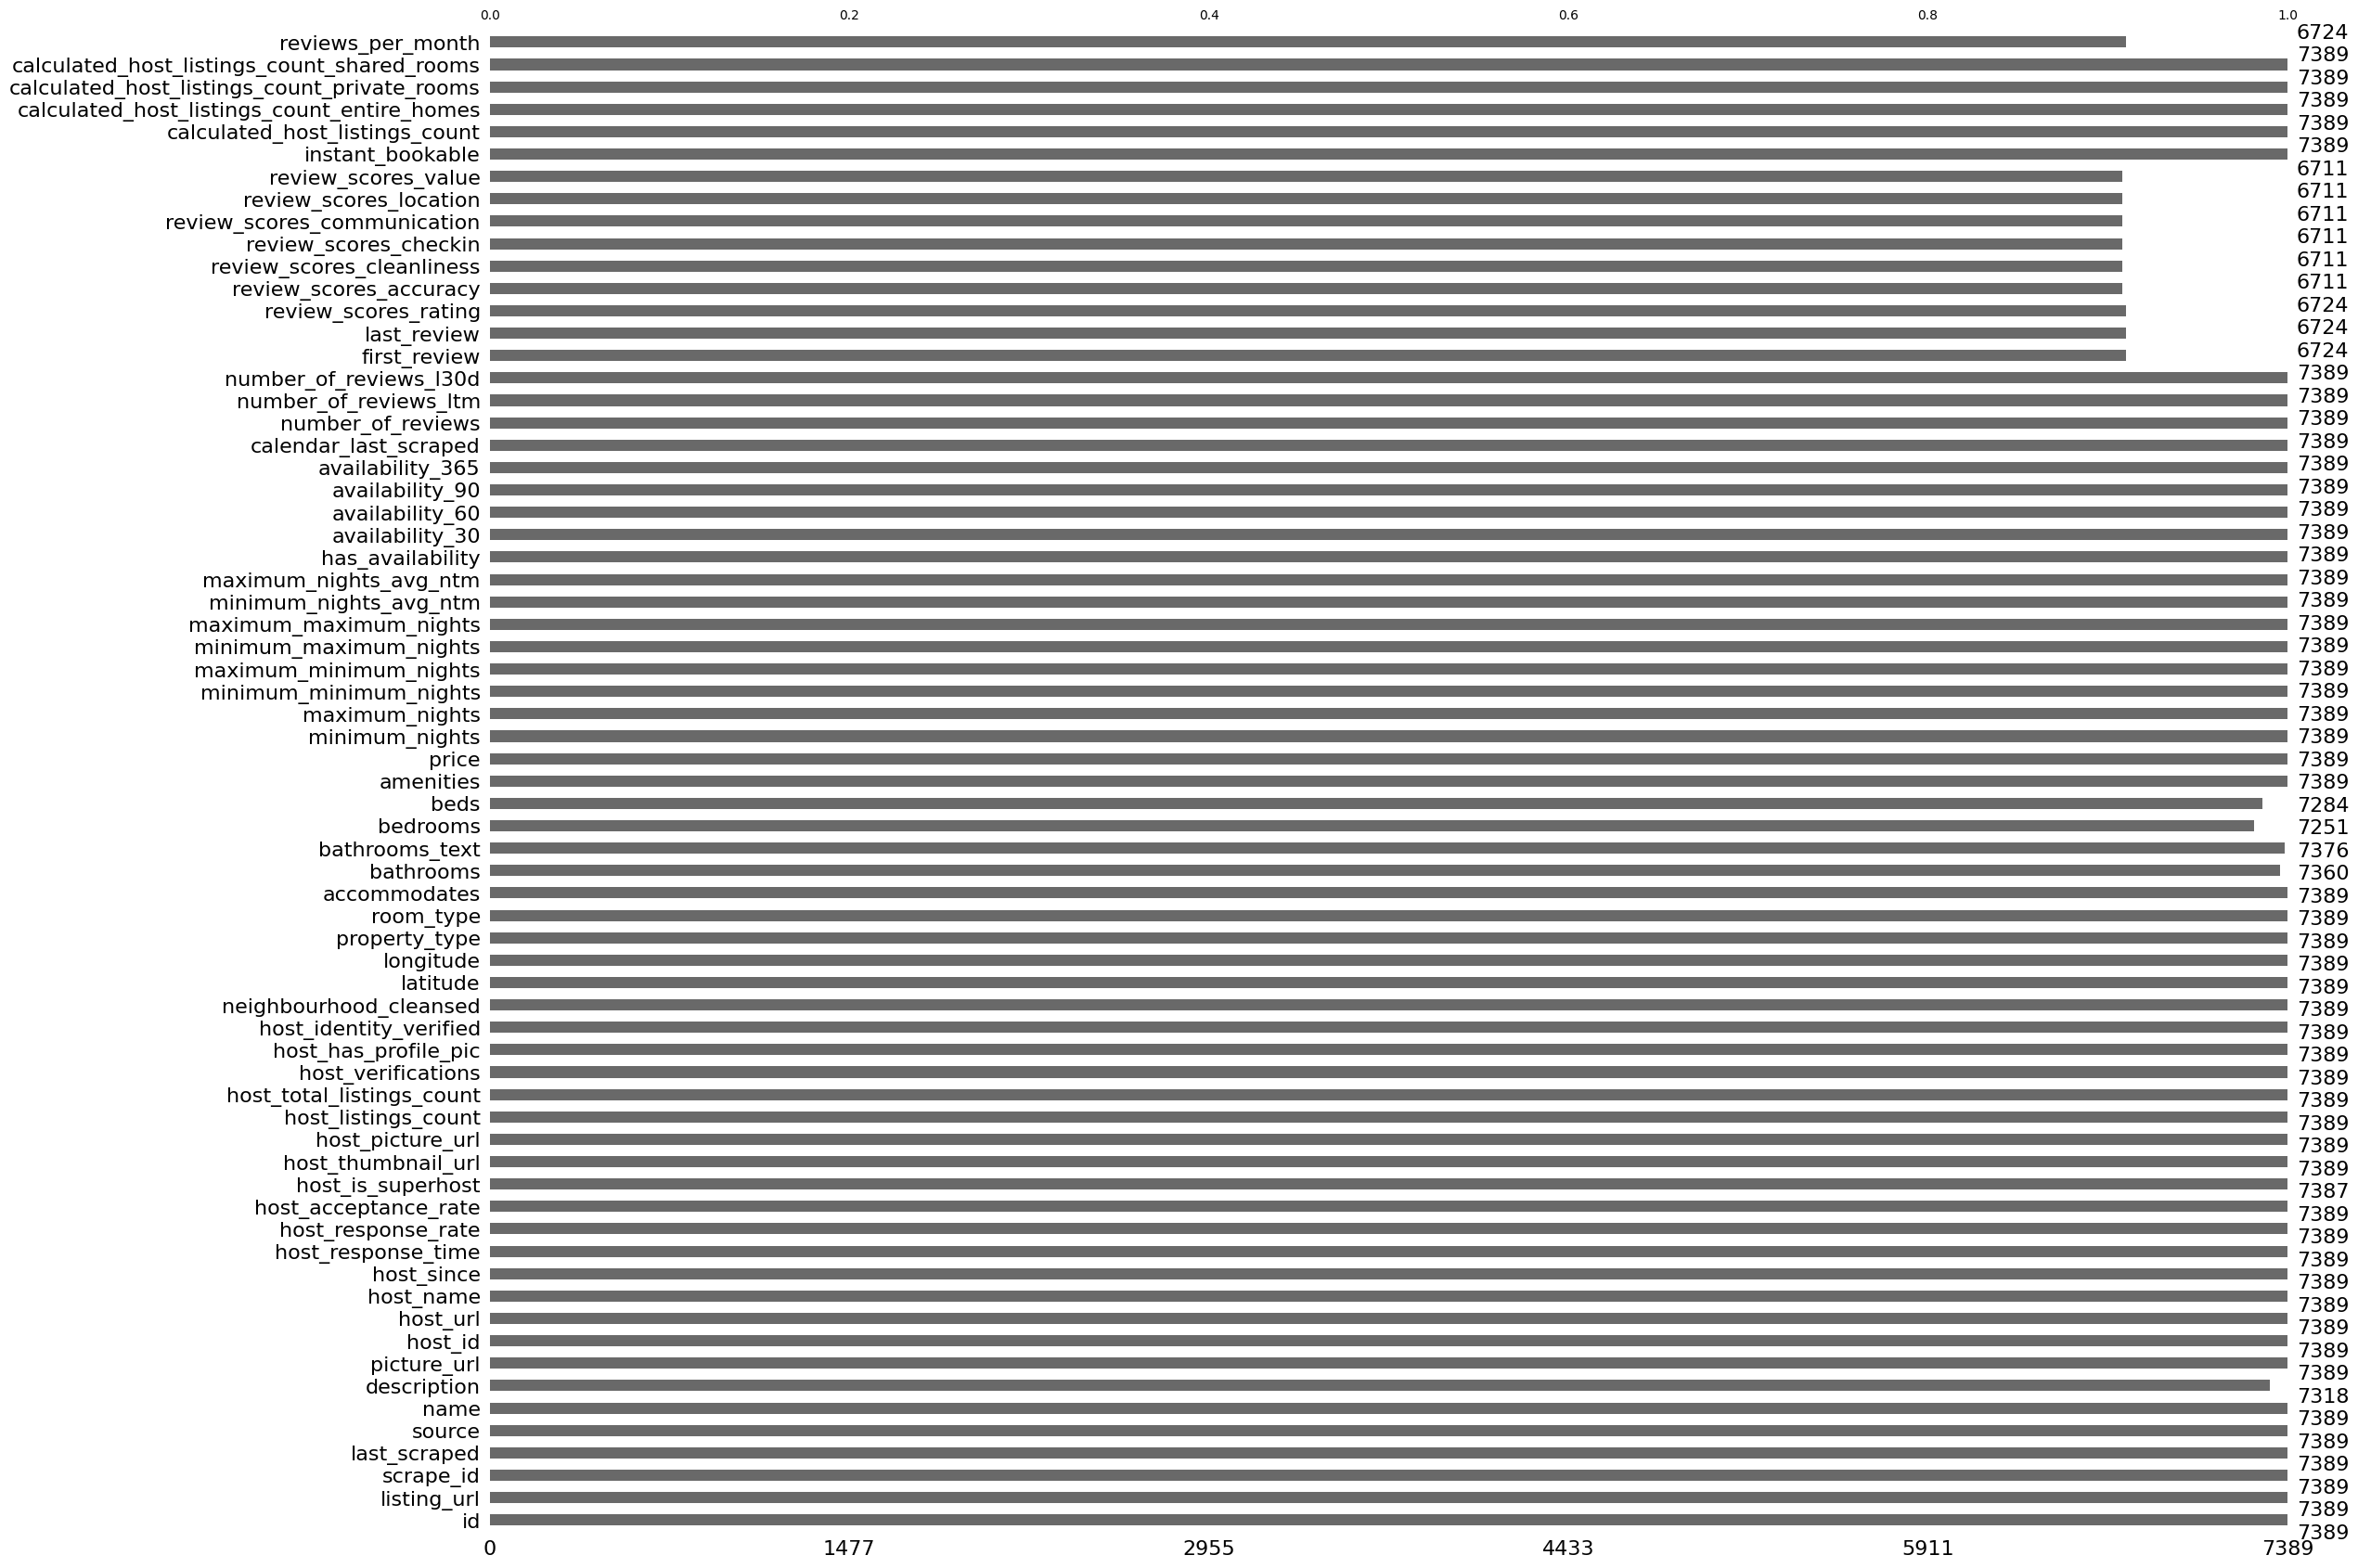

In [193]:
msno.bar(listings)

In [184]:
int(listings['host_acceptance_rate'].str.extract(r'(\d+)').astype(float).mean())

90

In [185]:
listings['host_acceptance_rate'].fillna(str(int(listings['host_acceptance_rate'].str.extract(r'(\d+)').astype(float).mean()))+'%', inplace=True)
listings['host_response_rate'].fillna((listings['host_response_rate'].value_counts().index[0]), inplace=True)
listings['host_response_time'].fillna((listings['host_response_time'].value_counts().index[0]), inplace=True)


In [196]:
listings.dropna(inplace=True)

<AxesSubplot:>

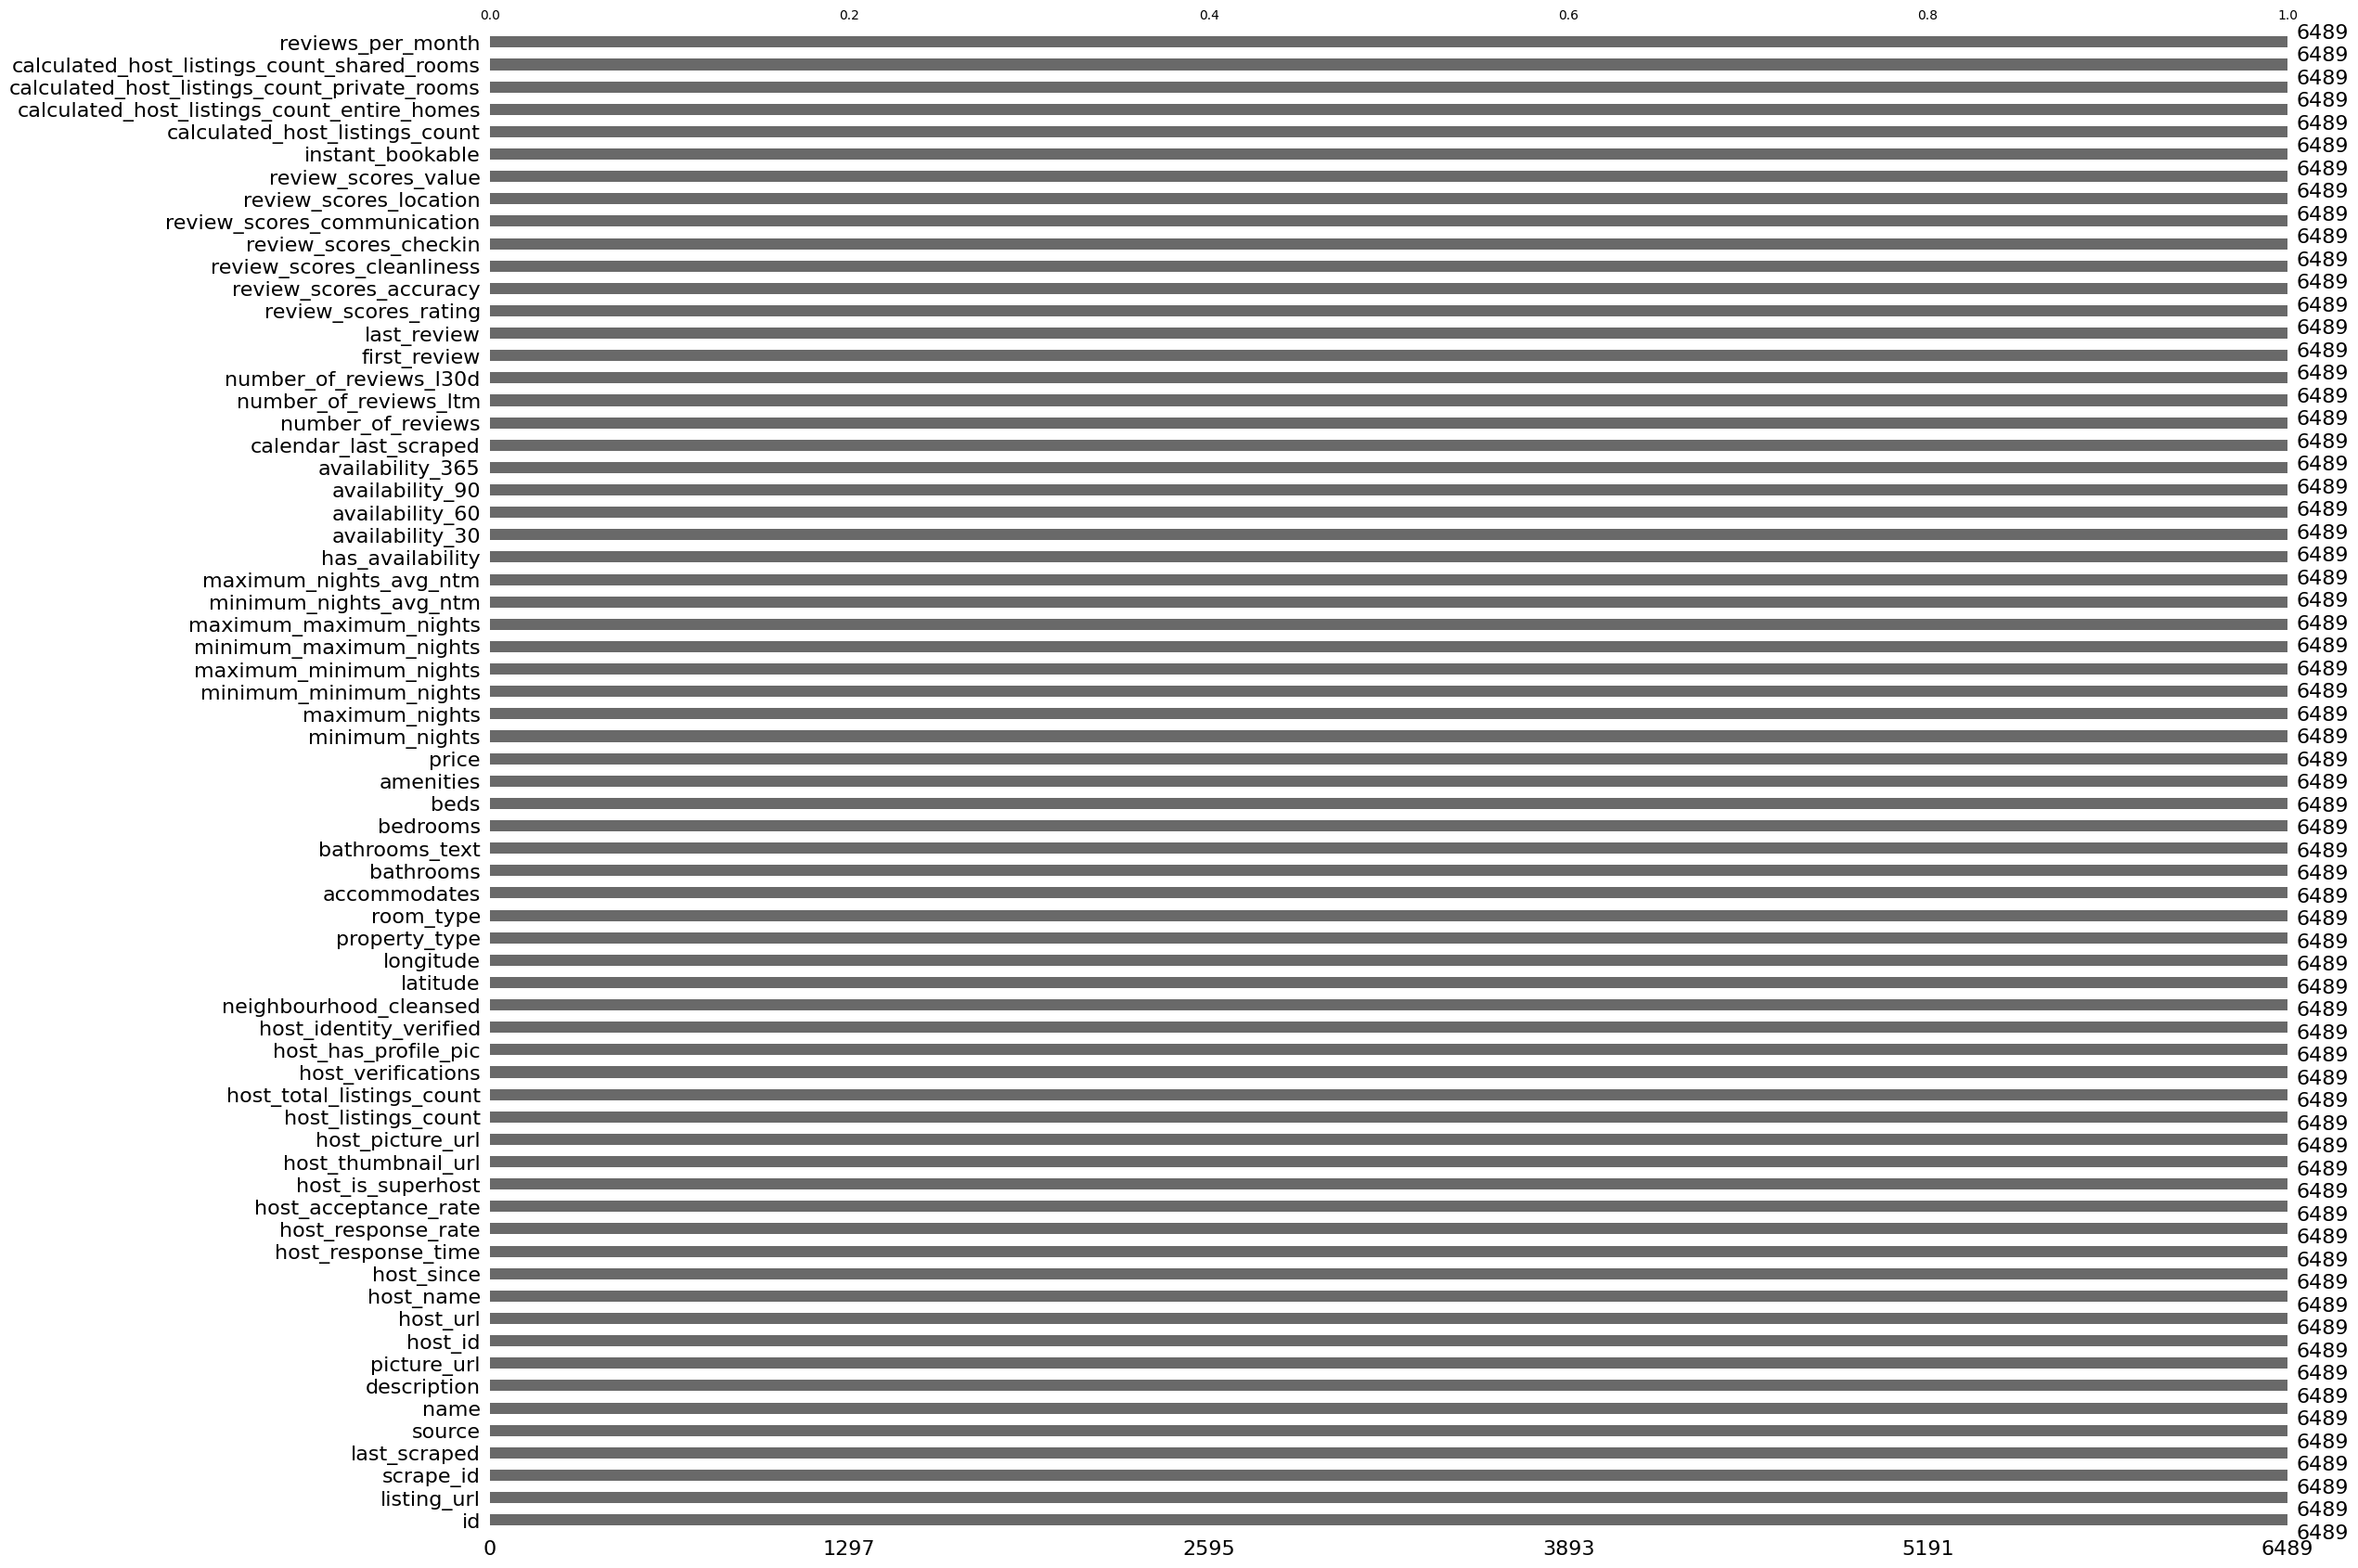

In [199]:
msno.bar(listings)

## TARGETS

1. Plotting polygon maps, later integrating with pricing maybe?
2. Figuring out filling na values with proper distriution
